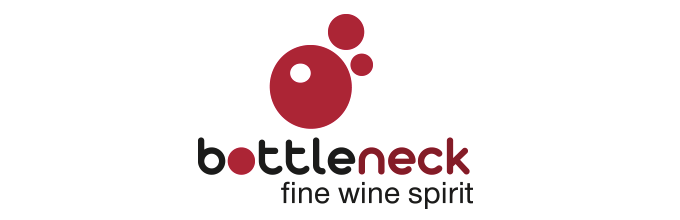

# Projet 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore') 

In [3]:
df_web = pd.read_excel('web.xlsx')
df_erp = pd.read_excel('erp.xls')
df_lias = pd.read_excel('liaison.xlsx')

## QC de données

In [4]:
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [5]:
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [6]:
df_lias.dtypes

product_id     int64
id_web        object
dtype: object

In [7]:
df_lias.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


## Valeurs manquantes

In [8]:
df_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [9]:
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [10]:
df_lias.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [11]:
df_lias.dropna(subset='id_web', inplace=True)
df_lias.isnull().sum()

product_id    0
id_web        0
dtype: int64

In [12]:
df_lias.describe()

,product_id
count,734.000000
mean,5041.859673
std,790.309295
min,3847.000000
25%,4287.250000
50%,4862.500000
75%,5714.250000
max,7338.000000


In [13]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [14]:
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [15]:
#pour lier les deux tables on doit modifier le type de product_id (et garder le même type que pour id_web)
df_lias['product_id']=df_lias["product_id"].astype('str')
df_lias.dtypes

product_id    object
id_web        object
dtype: object

In [16]:
#pour lier les deux tables on doit modifier le type de product_id (et garder le même type que pour id_web)
df_erp['product_id']= df_erp["product_id"].astype('str')
df_erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [17]:
#On doit fusioner les deux tables ERP et Liaison pour avoir la réference 
df_erp_li = pd.merge(df_erp, df_lias, how='left', on=['product_id'])
df_erp_li.describe()

,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000
mean,0.869091,32.415636,26.496970
std,0.337506,26.795849,45.892422
min,0.000000,5.200000,0.000000
25%,1.000000,14.600000,1.000000
50%,1.000000,24.400000,11.000000
75%,1.000000,42.000000,34.000000
max,1.000000,225.000000,578.000000


In [18]:
df_web.sort_values(by='post_title').head()#Vérifier s'il y a des doublons

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
610,15325,0,0,0,0.0,4.0,taxable,NaN,2.0,2019-03-27 17:59:49,...,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1381,15325,0,0,0,0.0,4.0,NaN,NaN,2.0,2019-03-27 17:59:49,...,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
611,15328,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1382,15328,0,0,0,0.0,3.0,NaN,NaN,2.0,2019-03-27 18:05:09,...,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
612,15329,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-27 18:28:15,...,agnes-levet-cote-rotie-peroline-2017,2020-07-28 09:45:02,2020-07-28 07:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# Éliminer les valeurs manquantes car on peut pas faire autrement si on n'en a pas leur ID 
df_web.dropna(subset='sku', inplace=True)

In [20]:
df_web = df_web.loc[df_web['post_type']=="product"]#Éliminer les doublons

In [21]:
df_web = df_web.rename(columns = {'sku':'id_web'}) #Modifie le Series pour fusioner les 3 tables
df_web['id_sint'] = df_web['guid'].str.strip().str[-4:] #pour vérifier le product_id
df_erp_web= pd.merge(df_web, df_erp_li, how='left', on=['id_web']) #Fusion de tables
df_erp_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,onsale_web,price,stock_quantity
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.0,714.000000,714.000000
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,1.0,32.493137,28.746499
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,0.0,27.810525,48.012608
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,5.200000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,14.100000,2.000000
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,23.550000,12.000000
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,42.175000,35.000000
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,1.0,225.000000,578.000000


In [22]:
df_erp_web.sort_values(by='price', ascending=False).head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,id_sint,product_id,onsale_web,price,stock_quantity,stock_status
200,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,0.0,product,NaN,0.0,4352,4352,1,225.0,0,outofstock
426,14581,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-17 09:45:39,...,0.0,product,NaN,0.0,5001,5001,1,217.5,20,instock
587,14983,0,0,0,0.0,3.0,taxable,NaN,2.0,2019-03-28 10:21:36,...,0.0,product,NaN,0.0,5892,5892,1,191.3,10,instock
219,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,0.0,product,NaN,0.0,4402,4402,1,176.0,8,instock
553,15185,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-13 14:43:22,...,0.0,product,NaN,0.0,5767,5767,1,175.0,12,instock


In [23]:
df_erp_web[df_erp_web['post_title'].isna()]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,menu_order,post_type,post_mime_type,comment_count,id_sint,product_id,onsale_web,price,stock_quantity,stock_status


In [24]:
df_erp_web = df_erp_web.rename(columns = {'post_title':'product_ref'})#Le nom du produit est dans le series post_title
df_erp_web.dropna(subset='product_ref', inplace=True) #On elimine les valeurs nuls

## Création d'une copie avec le choix des colonnes

In [25]:
df_we = df_erp_web[['id_web','product_id','id_sint','product_ref', 'price', 'stock_quantity', 'total_sales', 'onsale_web', 'post_excerpt']]
df_we.head() 

,id_web,product_id,id_sint,product_ref,price,stock_quantity,total_sales,onsale_web,post_excerpt
0,bon-cadeau-25-euros,4954,4954,Bon cadeau de 25€,25.0,0,10.0,1,"<span style=""color: #a85253;""><strong>Parlons ..."
1,15298,3847,3847,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,0,6.0,1,"Il exhale un nez subtil, racé avec du poivre f..."
2,15296,3849,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0,0.0,1,Les vieilles vignes lui apportent une rare pro...
3,15300,3850,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0,0.0,1,"Dentelle de fruit de jeunes syrah, aux tanins ..."
4,19814,4032,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,0,3.0,1,Gamine représente tout le fruité et la gourman...


In [26]:
df_we.dtypes

id_web             object
product_id         object
id_sint            object
product_ref        object
price             float64
stock_quantity      int64
total_sales       float64
onsale_web          int64
post_excerpt       object
dtype: object

In [27]:
df_we.sort_values(by='stock_quantity', ascending=False).head() #On verifie s'il y a des valeurs aberrantes de stock

,id_web,product_id,id_sint,product_ref,price,stock_quantity,total_sales,onsale_web,post_excerpt
127,16024,4208,4208,Domaine Montrose Côtes de Thongue Rosé 2019,7.6,578,16.0,1,"Un joli nez de petits fruits rouges, d'agrumes..."
652,16077,6207,6207,Domaine Giudicelli Patrimonio Rouge 2016,25.2,363,37.0,1,100% Nielluccio ce Patrimonio présente un nez ...
412,15958,4963,4963,Château Turcaud Bordeaux Rouge 2016,7.0,289,2.0,1,"<div id=""wrapper"">\n<div id=""container-wrapper..."
362,15307,4861,4861,Philippe Nusswitz Duché d'Uzès Orénia Rouge 2017,8.5,284,29.0,1,"<div id=""wrapper"">\n<div id=""container-wrapper..."
101,15629,4176,4176,Domaine de l'Hortus Pic Saint-Loup La Bergerie...,13.5,276,9.0,1,"<div class=""row"">\n<div class=""features-value ..."


In [28]:
df_we.sort_values(by='product_id')

,id_web,product_id,id_sint,product_ref,price,stock_quantity,total_sales,onsale_web,post_excerpt
1,15298,3847,3847,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,0,6.0,1,"Il exhale un nez subtil, racé avec du poivre f..."
2,15296,3849,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0,0.0,1,Les vieilles vignes lui apportent une rare pro...
3,15300,3850,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0,0.0,1,"Dentelle de fruit de jeunes syrah, aux tanins ..."
4,19814,4032,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,0,3.0,1,Gamine représente tout le fruité et la gourman...
5,19815,4039,4039,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,0,0.0,1,Le côte rôtie Carmina monte en puissance mais ...
...,...,...,...,...,...,...,...,...,...
709,16135,6930,6930,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,8.4,83,5.0,1,Belle robe jeune à dominante rubis soutenue. N...
710,15891,7023,7023,Camin Larredya Jurançon Sec La Virada 2018,27.5,15,0.0,1,L'exotisme du nez est complété par d'élégantes...
711,15887,7025,7025,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,69.0,2,0.0,1,"Pour cette cuvée, Jean-Paul Jamet recherche un..."
712,13127-1,7247,7247,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,54.8,23,0.0,1,"Nez gracieux, très élégant avec une touche flo..."


In [29]:
df_we.describe()

,price,stock_quantity,total_sales,onsale_web
count,714.000000,714.000000,714.000000,714.0
mean,32.493137,28.746499,4.012605,1.0
std,27.810525,48.012608,8.518183,0.0
min,5.200000,0.000000,0.000000,1.0
25%,14.100000,2.000000,0.000000,1.0
50%,23.550000,12.000000,1.000000,1.0
75%,42.175000,35.000000,4.000000,1.0
max,225.000000,578.000000,96.000000,1.0


## Ref produit + prix de vente + stock

In [30]:
df_we.head()

,id_web,product_id,id_sint,product_ref,price,stock_quantity,total_sales,onsale_web,post_excerpt
0,bon-cadeau-25-euros,4954,4954,Bon cadeau de 25€,25.0,0,10.0,1,"<span style=""color: #a85253;""><strong>Parlons ..."
1,15298,3847,3847,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,0,6.0,1,"Il exhale un nez subtil, racé avec du poivre f..."
2,15296,3849,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,0,0.0,1,Les vieilles vignes lui apportent une rare pro...
3,15300,3850,3850,Pierre Jean Villa Crozes-Hermitage Accroche Co...,20.8,0,0.0,1,"Dentelle de fruit de jeunes syrah, aux tanins ..."
4,19814,4032,4032,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,0,3.0,1,Gamine représente tout le fruité et la gourman...


In [31]:
df_we.isnull().sum()

id_web            0
product_id        0
id_sint           0
product_ref       0
price             0
stock_quantity    0
total_sales       0
onsale_web        0
post_excerpt      0
dtype: int64

## Chiffre d'affaires par produit

In [32]:
df_we_ca = df_we.copy()

In [33]:
df_we_ca.describe()

,price,stock_quantity,total_sales,onsale_web
count,714.000000,714.000000,714.000000,714.0
mean,32.493137,28.746499,4.012605,1.0
std,27.810525,48.012608,8.518183,0.0
min,5.200000,0.000000,0.000000,1.0
25%,14.100000,2.000000,0.000000,1.0
50%,23.550000,12.000000,1.000000,1.0
75%,42.175000,35.000000,4.000000,1.0
max,225.000000,578.000000,96.000000,1.0


In [34]:
df_we_ca['CA']=(df_we_ca['price']*df_we_ca['total_sales'])
df_we_ca.sort_values(by='CA', ascending=False).head(10)

,id_web,product_id,id_sint,product_ref,price,stock_quantity,total_sales,onsale_web,post_excerpt,CA
195,7818,4334,4334,Champagne Gosset Grand Blanc de Blancs,49.0,0,96.0,1,La bulle fine et presente se dirige vers la su...,4704.0
72,1662,4144,4144,Champagne Gosset Grand Rosé,49.0,11,87.0,1,"Le nez exprime sans détour la fraise, dans sa ...",4263.0
219,3510,4402,4402,Cognac Frapin VIP XO,176.0,8,13.0,1,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2288.0
71,11641,4142,4142,Champagne Gosset Grand Millésime 2006,53.0,8,30.0,1,"L'attaque est ample, gourmande avec une belle ...",1590.0
70,304,4141,4141,Champagne Gosset Grande Réserve,39.0,1,40.0,1,"Le nez, ouvert et expressif, évoque les fruits...",1560.0
202,12589,4355,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2,11.0,1,Le Blanc de Noirs représente le meilleur du sa...,1391.5
200,15940,4352,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0,5.0,1,Issu d’un assemblage de 70% de Pinot Noir du g...,1125.0
80,16237,4153,4153,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,0,36.0,1,"<span id=""u689-24"">Clos Baquey</span> est tr...",1044.0
651,16580,6206,6206,Domaine Giudicelli Patrimonio Blanc 2019,25.2,120,41.0,1,Ce Patrimonio Blanc signé Muriel Giudicelli no...,1033.2
31,16416,4068,4068,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,157,62.0,1,"Avec ses arômes de cassis, de myrtille, de cer...",1029.2


## Chiffre d'affaires totale

In [35]:
df_we_ca['CA'].sum()

70568.6

## Outliers / valeurs aberrantes

In [36]:
df_cms = df_we.loc[df_we['onsale_web']==1]  #cela ne change pas le nombre de produits
df_cms.count()

id_web            714
product_id        714
id_sint           714
product_ref       714
price             714
stock_quantity    714
total_sales       714
onsale_web        714
post_excerpt      714
dtype: int64

In [37]:
df_cms = df_cms[['product_ref', 'total_sales', 'stock_quantity', 'price','post_excerpt']] #post_excerpt
df_cms = df_cms.rename(columns = {'post_excerpt':'product_desc'})

In [38]:
df_cms.head()

,product_ref,total_sales,stock_quantity,price,product_desc
0,Bon cadeau de 25€,10.0,0,25.0,"<span style=""color: #a85253;""><strong>Parlons ..."
1,Pierre Jean Villa Saint-Joseph Préface 2018,6.0,0,24.2,"Il exhale un nez subtil, racé avec du poivre f..."
2,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0,0,34.3,Les vieilles vignes lui apportent une rare pro...
3,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0,0,20.8,"Dentelle de fruit de jeunes syrah, aux tanins ..."
4,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,3.0,0,14.1,Gamine représente tout le fruité et la gourman...


## Prix de produits et Outliers

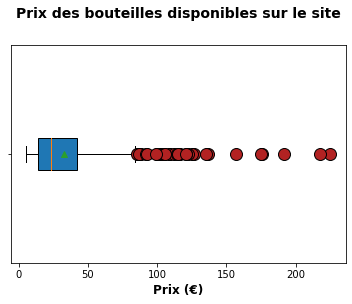

In [39]:
labels= ['']
flierprops = dict(marker='o', markerfacecolor='firebrick', markersize=12,linestyle='none')
plt.boxplot(x=df_cms['price'], labels=labels, flierprops=flierprops, vert=False, patch_artist=True, showmeans=True)
plt.title("Prix des bouteilles disponibles sur le site",fontsize=14, y=1.1, weight='bold')
plt.ylabel('')
plt.xlabel('Prix (€)',fontsize=12, y=1.1, weight='bold')
plt.show()

In [40]:
df_we.describe()

,price,stock_quantity,total_sales,onsale_web
count,714.000000,714.000000,714.000000,714.0
mean,32.493137,28.746499,4.012605,1.0
std,27.810525,48.012608,8.518183,0.0
min,5.200000,0.000000,0.000000,1.0
25%,14.100000,2.000000,0.000000,1.0
50%,23.550000,12.000000,1.000000,1.0
75%,42.175000,35.000000,4.000000,1.0
max,225.000000,578.000000,96.000000,1.0


In [41]:
q1 = np.quantile(df_we.price, 0.25)
 
q3 = np.quantile(df_we.price, 0.75)
med = np.median(df_we.price)
 
# iqr region
iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

28.075000000000003 84.28750000000001 -28.012500000000003


In [45]:
df_cms_out = df_we.loc[df_we['price']>upper_bound]
df_cms_out.sort_values(by='price', ascending=False).head(20)

,id_web,product_id,id_sint,product_ref,price,stock_quantity,total_sales,onsale_web,post_excerpt
200,15940,4352,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0,5.0,1,Issu d’un assemblage de 70% de Pinot Noir du g...
426,14581,5001,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,20,0.0,1,Robe cerise chatoyante. Un nez de fruits rouge...
587,14983,5892,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,10,3.0,1,Cet Ambonnay évoque les grands Pinots Noirs de...
219,3510,4402,4402,Cognac Frapin VIP XO,176.0,8,13.0,1,La cuvée VIP XO à été enrichie d’eaux-de-vie t...
553,15185,5767,5767,Camille Giroud Clos de Vougeot 2016,175.0,12,0.0,1,<div>Ce vin provient de vignes âgées de 50 ans...
222,7819,4406,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,3,0.0,1,Eau-de-Vie distillée à partir de raisins de Gr...
382,14220,4904,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,13,5.0,1,"Ce Corton Charlemagne éblouit par son assise, ..."
642,14923,6126,6126,Champagne Gosset Célébris Vintage 2007,135.0,10,2.0,1,Une robe somptueuse a la teinte jaune pâle eti...
202,12589,4355,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2,11.0,1,Le Blanc de Noirs représente le meilleur du sa...
511,14915,5612,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,12,0.0,1,"Né sur un sol marno-gréseux, ce Furstentum est..."


### Les individus "outliers" sont pas des valeurs aberrantes (sont des bouteilles coûteuses)

## Z-score comme indicateur de outlier

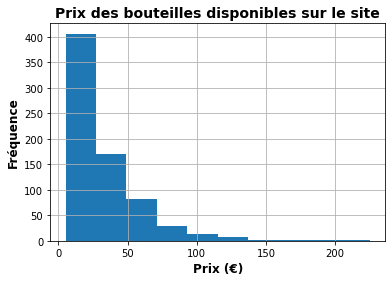

In [43]:
df_cms['price'].hist()
plt.title("Prix des bouteilles disponibles sur le site",fontsize=14, weight='bold')
plt.ylabel('Fréquence',fontsize=12, weight='bold')
plt.xlabel('Prix (€)',fontsize=12, y=1.1, weight='bold')
plt.show()

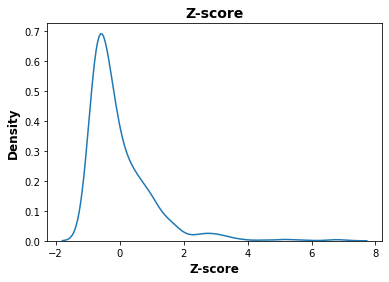

In [44]:
df_cms['z-score'] = (df_cms['price']-df_cms['price'].mean())/(df_cms['price'].std())
sns.kdeplot(data=df_cms['z-score'])
plt.title("Z-score",fontsize=14, weight='bold')
plt.ylabel('Density',fontsize=12, weight='bold')
plt.xlabel('Z-score',fontsize=12, y=1.1, weight='bold')
plt.show()